In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [0]:
def read_data(file_name, filter_top_ten=False ,lap_filter_low=0, lap_filter_high=201):
  data = {}

  data['year'] = file_name[file_name.find('20'):-5]
  data['pit_laps'] = pd.read_excel(file_name, sheet_name='pit_laps', index_col=0)
  data['since_last_pit'] = pd.read_excel(file_name, sheet_name='since_last_pit', index_col=0)
  data['lap_time'] = pd.read_excel(file_name, sheet_name='lap_times', index_col=0)
  data['since_last_pit_green'] = pd.read_excel(file_name, sheet_name='lap_since_last_pit_green', index_col=0)
  data['since_last_pit_yellow'] = pd.read_excel(file_name, sheet_name='lap_since_last_pit_yellow', index_col=0)
  data['till_next_pit'] = pd.read_excel(file_name, sheet_name='till_next_pit', index_col=0)
  data['lap_till_next_pit'] = pd.read_excel(file_name, sheet_name='lap_till_next_pit', index_col=0)
  data['yellow_flag'] = pd.read_excel(file_name, sheet_name='yellow_flag_laps', index_col=0)
  data['race_rank'] = pd.read_excel(file_name, sheet_name='race_rank', index_col=0)
  data['fuel'] = pd.read_excel(file_name, sheet_name='fuel_since_last_pit', index_col=0)

  # I want column names as integer values. The following part handles that
  car_numbers  = data['lap_time'].columns.values
  car_number_int = [int(val) for val in car_numbers]
  data['since_last_pit'].columns = car_number_int
  data['lap_time'].columns = car_number_int
  data['since_last_pit_green'].columns = car_number_int
  data['since_last_pit_yellow'].columns = car_number_int
  data['till_next_pit'].columns = car_number_int
  data['lap_till_next_pit'].columns = car_number_int
  data['pit_laps'].columns = car_number_int
  data['fuel'].columns = car_number_int


  if filter_top_ten:
    top_ten = data['race_rank']['race_rank'].values[:10]
    data['since_last_pit'] = data['since_last_pit'][top_ten]
    data['lap_time'] = data['lap_time'][top_ten]
    data['since_last_pit_green'] = data['since_last_pit_green'][top_ten]
    data['since_last_pit_yellow'] = data['since_last_pit_yellow'][top_ten]
    data['till_next_pit'] = data['till_next_pit'][top_ten]
    data['lap_till_next_pit'] = data['lap_till_next_pit'][top_ten]
    data['race_rank'] = data['race_rank'][:10]
    data['pit_laps'] = data['pit_laps'][top_ten]
    data['fuel'] = data['fuel'][top_ten]


  # if we want to get certain lap intervals, this part is usefull
  data['since_last_pit'] = data['since_last_pit'].loc[lap_filter_low:lap_filter_high,:]
  data['lap_time'] = data['lap_time'].loc[lap_filter_low:lap_filter_high,:]
  data['since_last_pit_green'] = data['since_last_pit_green'].loc[lap_filter_low:lap_filter_high,:]
  data['since_last_pit_yellow'] = data['since_last_pit_yellow'].loc[lap_filter_low:lap_filter_high,:]
  data['till_next_pit'] = data['till_next_pit'].loc[lap_filter_low:lap_filter_high,:]
  data['lap_till_next_pit'] = data['lap_till_next_pit'].loc[lap_filter_low:lap_filter_high,:]
  data['yellow_flag'] = data['yellow_flag'].loc[lap_filter_low:lap_filter_high,:]
  data['fuel'] = data['fuel'].loc[lap_filter_low:lap_filter_high,:]

  
  return data




def find_yellow_flag_parts(yellow_df):
  yellow_laps = yellow_df['laps'].values

  yellow_ranges = []
  yellow_start = 0

  for i in range(1, len(yellow_laps)):

    if yellow_laps[i] == 1 and yellow_laps[i-1] == 0:
      yellow_start = i
      continue
    if yellow_laps[i] == 0 and yellow_laps[i-1] == 1:
      yellow_ranges.append([yellow_start - 0.5, i-1 + 0.5])
  return yellow_ranges




In [0]:
data13  = read_data('PitStopData/LapTime2013.xlsx', filter_top_ten=True)
data14  = read_data('PitStopData/LapTime2014.xlsx', filter_top_ten=True)
data15  = read_data('PitStopData/LapTime2015.xlsx', filter_top_ten=True)
data16  = read_data('PitStopData/LapTime2016.xlsx', filter_top_ten=True)
data17  = read_data('PitStopData/LapTime2017.xlsx', filter_top_ten=True)
data18  = read_data('PitStopData/LapTime2018.xlsx', filter_top_ten=True)
data19  = read_data('PitStopData/LapTime2019.xlsx', filter_top_ten=True)

In [0]:
data13_p1  = read_data('PitStopData/LapTime2013.xlsx', filter_top_ten=True, lap_filter_low=8, lap_filter_high=29)
data13_p2  = read_data('PitStopData/LapTime2013.xlsx', filter_top_ten=True, lap_filter_low=63, lap_filter_high=173)
data14_p1  = read_data('PitStopData/LapTime2014.xlsx', filter_top_ten=True, lap_filter_low=0, lap_filter_high=118)
data15_p1  = read_data('PitStopData/LapTime2015.xlsx', filter_top_ten=True, lap_filter_low=13, lap_filter_high=35)
data15_p2  = read_data('PitStopData/LapTime2015.xlsx', filter_top_ten=True, lap_filter_low=71, lap_filter_high=97)
data15_p3  = read_data('PitStopData/LapTime2015.xlsx', filter_top_ten=True, lap_filter_low=124, lap_filter_high=148)
data16_p1  = read_data('PitStopData/LapTime2016.xlsx', filter_top_ten=True, lap_filter_low=0, lap_filter_high=28)
data16_p2  = read_data('PitStopData/LapTime2016.xlsx', filter_top_ten=True, lap_filter_low=168, lap_filter_high=201)
data17_p1  = read_data('PitStopData/LapTime2017.xlsx', filter_top_ten=True, lap_filter_low=0, lap_filter_high=28)
data17_p2  = read_data('PitStopData/LapTime2017.xlsx', filter_top_ten=True, lap_filter_low=86, lap_filter_high=104)

In [0]:
def visualize_laptime(data):
  fig = go.Figure()

  car_numbers = data['race_rank']['race_rank'].values

  for car_idx, car_num in enumerate(car_numbers):

    pit_laps = data['pit_laps'][car_num]
    pit_laps=pit_laps[pit_laps.notnull()].astype(int).values
    pit_laps_laptime = data['lap_time'][car_num][data['lap_time'].index.isin(pit_laps)].values
    fig.add_trace(go.Scatter(x=data['lap_time'].index.values, y=data['lap_time'][car_num].values,
              mode='lines', name=str(car_num) + ' lap_time', legendgroup=str(car_num)))
    fig.add_trace(go.Scatter(x=pit_laps, y=pit_laps_laptime,
              mode='markers', name=str(car_num) + ' pit laps', legendgroup=str(car_num)))


  yellow_shapes = []

  for l_min, l_max in find_yellow_flag_parts(data['yellow_flag']):
    yellow_shapes.append(
      dict(
      type="rect",
      # x-reference is assigned to the x-values
      xref="x",
      # y-reference is assigned to the plot paper [0,1]
      yref="paper",
      x0=l_min,
      y0=0,
      x1=l_max,
      y1=1,
      fillcolor="Yellow",
      opacity=0.5,
      layer="below",
      line_width=0)
      )

  fig.update_layout(shapes=yellow_shapes)

  fig.update_layout(
    title='Lap Time of ' + data['year'] + ' Data',
    xaxis_title="Lap",
    yaxis_title="Lap Time (seconds)"
    )
  fig.show()

In [0]:
visualize_laptime(data17)

In [0]:
def generate_data(data_list):
  train_X = []
  train_y = []

  for data in data_list:
    for car_num in data['race_rank']['race_rank'].values:
      input_data = input_scaler.transform(np.array([data['since_last_pit'][car_num].values, data['since_last_pit_green'][car_num].values, data['since_last_pit_yellow'][car_num].values, data['fuel'][car_num].values]).transpose())
      #input_data = input_scaler.transform(np.array([data['since_last_pit'][car_num].values, data['since_last_pit_green'][car_num].values, data['since_last_pit_yellow'][car_num].values]).transpose())
      output_data = output_scaler.transform(np.array(data['lap_till_next_pit'][car_num].values).reshape(-1,1))
      for i in range(len(data['lap_time'])- time_step - future_pred):
        train_X.append(input_data[i:i+time_step])
        train_y.append(output_data[i+time_step+future_pred])
        #print('car_number', car_num,'input from:', i, 'to:',i+time_step, 'output:', i+time_step+future_pred)


  train_X = np.array(train_X)
  train_y = np.array(train_y)

  return train_X, train_y

In [6]:
time_step = 15
future_pred = 1



from sklearn.preprocessing import MinMaxScaler

input_scaler = MinMaxScaler(feature_range=(0, 1))
output_scaler = MinMaxScaler(feature_range=(0, 1))

input_scaler.fit(np.array([ data18['since_last_pit'][12].values, data18['since_last_pit_green'][12].values, data18['since_last_pit_yellow'][12].values, data18['fuel'][12].values]).transpose())
#input_scaler.fit(np.array([ data18['since_last_pit'][12].values, data18['since_last_pit_green'][12].values, data18['since_last_pit_yellow'][12].values]).transpose())
output_scaler.fit(data18['lap_till_next_pit'][12].values.reshape(-1,1))




#train_X, train_y = generate_data([data13_p1, data13_p2, data14_p1, data15_p1, data15_p2, data15_p3, data16_p1, data16_p2, data17_p1, data17_p2]) #([data13, data14, data15, data16, data17])
train_X, train_y = generate_data([data13, data14, data15, data16, data17])


print(train_X.shape)
print(train_y.shape)


(9250, 15, 4)
(9250, 1)


In [7]:
print(train_X.min(), train_X.max())

print(train_y.min(), train_y.max())

-7.953991873830932e-05 1.013030139576098
0.0 1.0


In [0]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(LSTM(64, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(4))
#model.add(tf.keras.layers.Flatten())
#model.add(Dense(10))
model.add(Dense(1))
#model.add(Dropout(0.5))
model.compile(loss='mae', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 64)            17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 32)            12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 16)            3136      
_________________________________________________________________
lstm_3 (LSTM)                (None, 4)                 336       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 33,557
Trainable params: 33,557
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_X, train_y, epochs=100, batch_size=20, verbose=2, shuffle=True, validation_split=0.1)

Epoch 1/100
417/417 - 4s - loss: 0.1515 - val_loss: 0.1016
Epoch 2/100
417/417 - 3s - loss: 0.1216 - val_loss: 0.0992
Epoch 3/100
417/417 - 3s - loss: 0.1160 - val_loss: 0.0897
Epoch 4/100
417/417 - 3s - loss: 0.1109 - val_loss: 0.0853
Epoch 5/100
417/417 - 3s - loss: 0.1081 - val_loss: 0.0870
Epoch 6/100
417/417 - 3s - loss: 0.1057 - val_loss: 0.0934
Epoch 7/100
417/417 - 3s - loss: 0.1046 - val_loss: 0.0991
Epoch 8/100
417/417 - 3s - loss: 0.1038 - val_loss: 0.0974
Epoch 9/100
417/417 - 3s - loss: 0.1035 - val_loss: 0.0916
Epoch 10/100
417/417 - 3s - loss: 0.1015 - val_loss: 0.1083
Epoch 11/100
417/417 - 3s - loss: 0.1007 - val_loss: 0.0926
Epoch 12/100
417/417 - 3s - loss: 0.0992 - val_loss: 0.0962
Epoch 13/100
417/417 - 3s - loss: 0.0975 - val_loss: 0.1022
Epoch 14/100
417/417 - 3s - loss: 0.0968 - val_loss: 0.0979
Epoch 15/100
417/417 - 3s - loss: 0.0961 - val_loss: 0.1069
Epoch 16/100
417/417 - 3s - loss: 0.0936 - val_loss: 0.0944
Epoch 17/100
417/417 - 3s - loss: 0.0925 - val_lo

Text(0, 0.5, 'mean_squared_error')

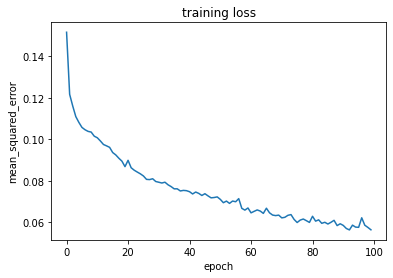

In [11]:

plt.plot(history.history['loss'])
plt.title('training loss')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')

Text(0, 0.5, 'mean_squared_error')

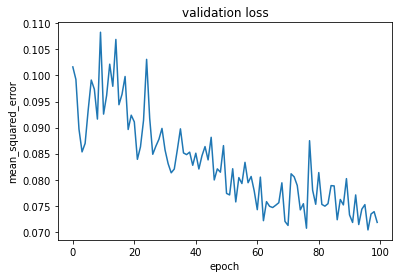

In [12]:
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')

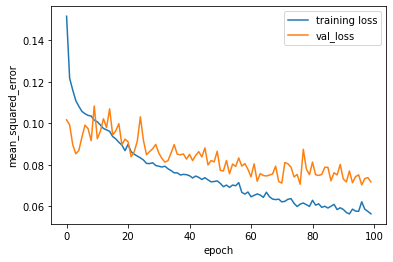

In [16]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()

In [0]:
def visualize_prediction(data,  time_step):
  fig = go.Figure()

  car_numbers = data['race_rank']['race_rank'].values

  test_X, test_y = generate_data([data])

  print('test_X:', test_X.shape)

  test_mae = 0

  for car_idx, car_num in enumerate(car_numbers):
    prediction = output_scaler.inverse_transform(model.predict(test_X[car_idx * (200-time_step):car_idx * (200-time_step) + (200-time_step)]))
    fig.add_trace(go.Scatter(x=[i for i in range(time_step+1,201)], y=prediction[:,0],
              mode='lines', name= 'prediction_' + str(car_num), legendgroup=str(car_num)))
    fig.add_trace(go.Scatter(x=[i for i in range(time_step+1,201)], y=data['lap_till_next_pit'][car_num].values[time_step+1:],
              mode='lines', name= 'real_' + str(car_num), legendgroup=str(car_num)))
    

    test_mae += np.sum(np.abs(prediction[:,0] - data['till_next_pit'][car_num].values[time_step+1:]))/len(data['till_next_pit'][car_num].values[time_step+1:])
    #test_mae += np.sum(np.abs(prediction[:,0] - data[sheet_names[-3]][car_num].values[time_step+1:]))/len(data[sheet_names[-3]][car_num].values[time_step+1:])
  print('test mae:', test_mae)


  yellow_shapes = []

  for l_min, l_max in find_yellow_flag_parts(data['yellow_flag']):
    yellow_shapes.append(
      dict(
      type="rect",
      # x-reference is assigned to the x-values
      xref="x",
      # y-reference is assigned to the plot paper [0,1]
      yref="paper",
      x0=l_min,
      y0=0,
      x1=l_max,
      y1=1,
      fillcolor="Yellow",
      opacity=0.5,
      layer="below",
      line_width=0)
      )

  fig.update_layout(shapes=yellow_shapes)

  fig.update_layout(
    title='Lap Number till next pit stop prediction of ' + data['year'] + ' Data',
    xaxis_title="Lap",
    yaxis_title="Number of Laps Till Next PitStop"
    )
  fig.show()




# 2018 Prediction Without Fuel Level

In [0]:
visualize_prediction(data18,  time_step)

test_X: (1850, 15, 3)
test mae: 8258.670607526697


# 2018 Prediction With Fuel Level

In [0]:
visualize_prediction(data18,  time_step)

test_X: (1850, 15, 4)
test mae: 8239.85551138518


# 2019 Prediction Without Fuel Level

In [0]:
visualize_prediction(data19,  time_step)

test_X: (1850, 15, 3)
test mae: 7042.872881501739


# 2019 Predcition With Fuel Level

In [0]:
visualize_prediction(data19,  time_step)

test_X: (1850, 15, 4)
test mae: 7042.060794307722
